### 导入车辆轨迹

In [16]:
import pandas as pd
import numpy as np

from datetime import datetime

from collections import Counter

fpath='../比赛/轨迹数据.txt'

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv(fpath)#轨迹数据.txt 格式有问题，每个行尾多了个，号

In [18]:
# df2=df[df['vehicle-id']=='4c0c4745067197be22182d262b44f48a']
df2=df[df['vehicle-id']=='f3bc6bd1462edd25f7ae844143e8f65d']
df2.head()

,vehicle-id,time,x-coordinate,y-coordinate,speed,category
63,f3bc6bd1462edd25f7ae844143e8f65d,1493853530,521726.523312,55080.257718,12.8,1
64,f3bc6bd1462edd25f7ae844143e8f65d,1493853533,521689.796286,55057.042483,14.3,1
65,f3bc6bd1462edd25f7ae844143e8f65d,1493853536,521657.521151,55036.505930,12.8,1
66,f3bc6bd1462edd25f7ae844143e8f65d,1493853539,521623.020278,55016.862270,12.8,1
67,f3bc6bd1462edd25f7ae844143e8f65d,1493853542,521588.519545,54999.004397,13.1,1


In [26]:
def time_to_hour(x):
    dt=datetime.fromtimestamp(x)
    return dt.day

In [21]:
# dt=datetime.fromtimestamp(1493853539)
# dt.date(),dt.day

In [28]:
dt1=df2['time'].apply(time_to_hour)#没用
c=Counter(list(dt1))
c

Counter({4: 76})

In [30]:
x=list(df2['x-coordinate'])
#x[:10]
y=list(df2['y-coordinate'])
#y[:10]

In [5]:
from config import cross_cord

In [6]:
cx=[];cy=[]
for z in range(1,8):
#     print(z)
    cx.append(cross_cord[str(z)]['x'])
    cy.append(cross_cord[str(z)]['y'])
print(cx,cy)

[521677, 521580, 521520, 521452, 521433, 521411, 521400] [58109, 57466, 57059, 56668, 55855, 54822, 53998]


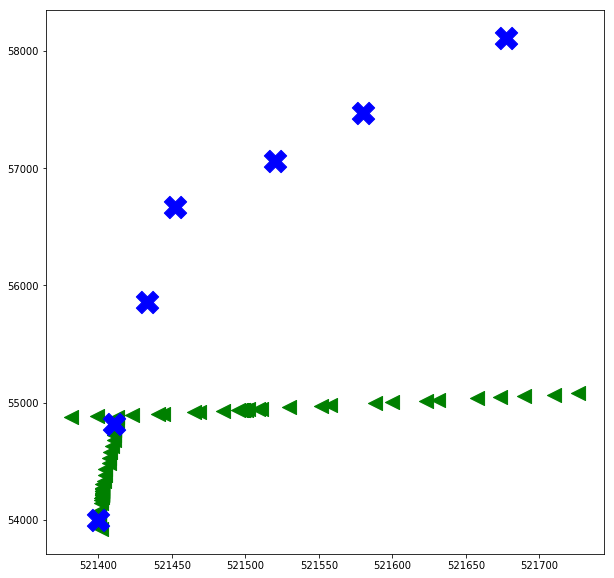

In [39]:
%matplotlib inline
fig = plt.figure(figsize = (10,10))
plt.scatter(x,y, 200, color ='green',marker='<')
plt.scatter(cx,cy, 500, color ='blue',marker='X')
plt.show()

<IPython.core.display.Javascript object>


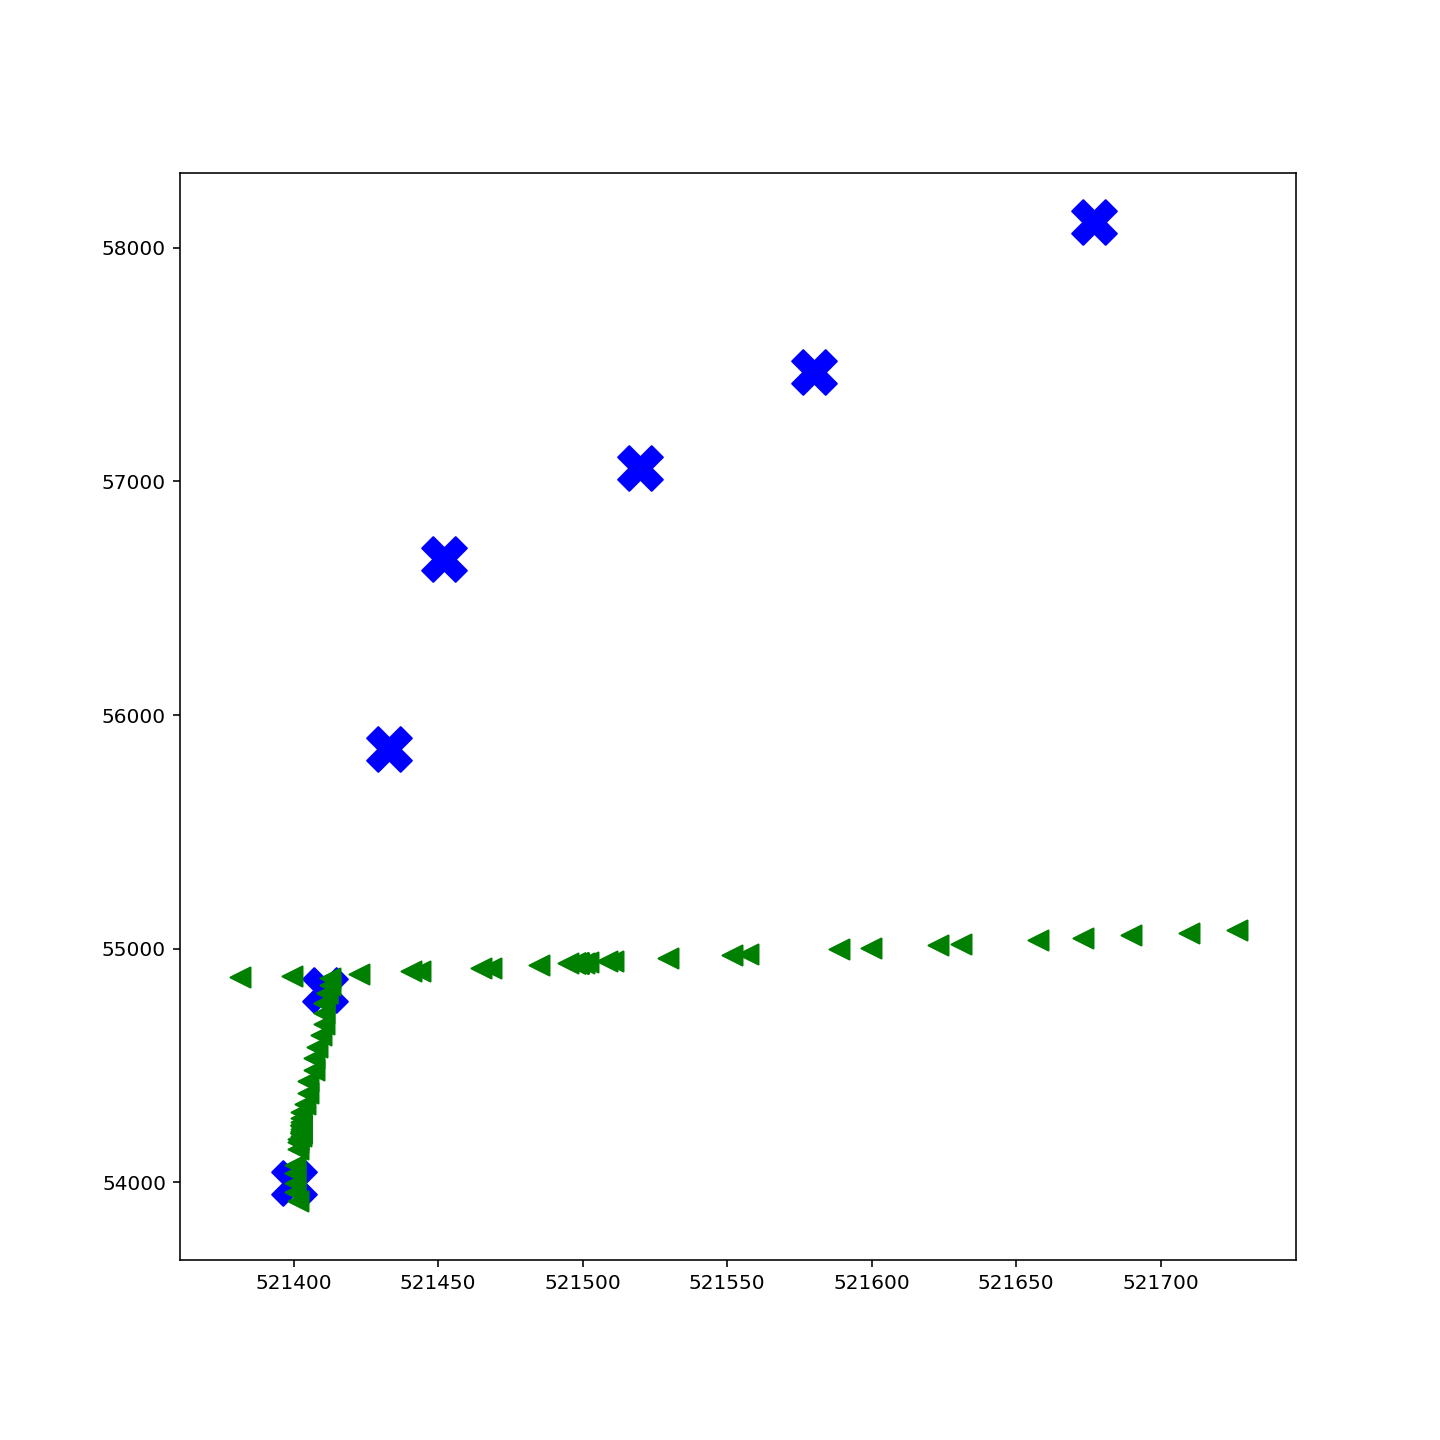

In [37]:
#动态显示轨迹图,2天,经过2个十字路口
%matplotlib notebook
#要切回inline模式
fig = plt.figure(figsize = (10,10))
# fig = plt.figure()
ax1 = fig.add_subplot(111)
plt.ion()

fig.show()
fig.canvas.draw()

ax1.scatter(cx,cy, 500, color ='blue',marker='X')

for x1,y1 in zip(x,y):
    ax1.scatter(x1,y1, 100, color ='green',marker='<')
#     plt.pause(0.1)#不能取消
    fig.canvas.draw()

plt.ioff()
plt.show()

## 经过哪些路口